In [333]:
import numpy as np
from sklearn.utils import shuffle
# generation of 100 3D points according to the centered normal law
# each group is translated by a vector [3,3,3]
d1 = np.random.randn(100,3) + [3,3,3]
d2 = np.random.randn(100,3) + [-3,-3,-3]
d3 = np.random.randn(100,3) + [-3,3,3]
d4 = np.random.randn(100,3) + [-3,-3,3]
d5 = np.random.randn(100,3) + [3,3,-3]
# generation of labels for each group
c1 = np.ones(100)
c2 = 2 * np.ones(100)
c3 = 3 * np.ones(100)
c4 = 4 * np.ones(100)
c5 = 5 * np.ones(100)
# concatenation of data in a matrix
data = np.concatenate((d1,d2,d3,d4,d5))
labels = np.concatenate((c1, c2, c3, c4, c5))
print(data.shape)
# random permutation of the rows of the data matrix
data, labels = shuffle(data, labels)

(500, 3)


Visualize the starting groups:

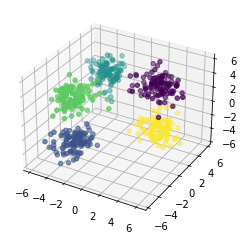

In [334]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# The color of the points depends on their label
ax.scatter(data[:,0], data[:,1], data[:,2], c=labels)
plt.show()

Apply automatic classification with K-means, first with a single trial (a single initialization
followed by a single execution of K-means, n_init=1) using the k-means++
initialization method:

In [335]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=1, init='k-means++').fit(data)

C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Review the parameters, attributes, and methods of the sklearn.cluster.KMeans
class by following the link given above. The predicted groups for the data can be obtained
using the predict(X) method:

In [336]:
pred = kmeans.predict(data)

Groups associated with training examples are also stored in the kmeans.labels_
attribute:

In [337]:
print(kmeans.labels_)

[0 3 0 2 2 4 4 1 4 4 4 1 2 0 4 0 3 3 4 3 4 2 0 0 3 3 2 3 0 1 3 1 3 3 2 1 1
 1 3 2 2 1 0 3 0 0 3 3 0 3 2 2 2 3 2 1 0 0 1 3 0 4 0 0 2 0 1 3 2 1 4 1 0 4
 2 3 0 4 1 0 2 1 3 3 4 1 0 2 2 3 4 2 4 1 2 2 1 3 3 3 1 3 0 4 1 2 0 3 2 3 3
 1 4 2 3 3 2 4 3 2 1 4 0 3 4 4 2 2 2 1 1 4 1 1 0 3 1 2 3 4 1 1 3 2 0 0 0 4
 1 3 0 2 4 2 0 3 0 0 2 4 4 0 2 2 3 1 4 4 1 0 4 4 1 4 1 1 4 3 4 4 3 3 2 0 4
 0 1 3 2 2 0 3 0 1 2 0 0 4 2 2 4 3 1 4 1 3 4 1 0 4 0 0 4 4 1 1 0 2 4 0 0 0
 1 3 4 3 1 4 3 4 4 4 2 2 3 4 4 2 2 1 2 1 2 2 4 2 3 1 1 2 4 3 2 2 0 1 4 1 1
 3 3 1 3 0 4 1 3 0 4 3 3 0 2 3 0 2 0 1 1 2 0 1 1 2 3 3 2 3 1 1 1 0 1 1 1 2
 2 1 3 4 2 4 3 1 2 2 0 4 0 0 0 3 0 3 1 3 3 0 4 2 2 2 3 0 0 1 0 1 1 0 3 1 1
 0 2 0 0 3 2 4 4 4 2 2 4 4 3 1 1 1 0 4 4 2 4 1 2 1 4 4 4 1 2 2 3 2 1 2 1 4
 3 0 4 4 2 4 4 3 3 1 4 3 3 3 2 1 3 2 1 0 0 4 4 2 0 0 4 2 4 2 0 0 1 4 2 4 0
 2 1 3 3 0 4 1 2 1 2 0 2 1 4 0 1 1 4 1 4 2 0 2 2 1 0 3 3 2 0 0 4 3 3 2 4 4
 3 3 0 1 3 2 3 0 4 1 4 0 2 4 3 4 3 2 0 0 4 2 4 3 3 3 3 1 2 1 0 0 0 4 2 4 4
 0 3 4 0 0 3 0 0 2 1 2 4 

Visualize the results of this classification:

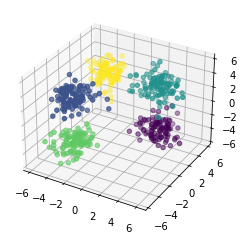

In [338]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=pred)
plt.show()

It is possible to assess the consistency between the starting groups and the partitioning
found by K-means using the adjusted Rand index:

In [339]:
from sklearn import metrics
metrics.adjusted_rand_score(pred, labels)

0.9899699009151338

The call to metrics.adjusted_rand_score() compares the partitioning obtained
by the automatic classification (pred group labels) with the partitioning corresponding to
the groups defined at the start (labels stored in labels).

Now apply automatic classification with K-means with a single trial (n_init = 1) using
the random initialization method:

In [340]:
kmeans = KMeans(n_clusters=5, n_init=1, init='random').fit(data)
metrics.adjusted_rand_score(kmeans.labels_, labels)

C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0.9949848742198414

Question 1: Repeat the classification several times with each of these two initialization
methods and each time examine the consistency of the groups obtained with the starting
groups. What do you notice? Explain.

In [341]:
 # n_init = 2

In [342]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=2, init='k-means++').fit(data)

C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [343]:
pred_01 = kmeans.predict(data)

In [344]:
print(kmeans.labels_)

[1 2 1 3 3 0 0 4 0 0 0 4 3 1 0 1 2 2 0 2 0 3 1 1 2 2 3 2 1 4 2 4 2 2 3 4 4
 4 2 3 3 4 1 2 1 1 2 2 1 2 3 3 3 2 3 4 1 1 4 2 1 0 1 1 3 1 4 2 3 4 0 4 1 0
 3 2 1 0 4 1 3 4 2 2 0 4 1 3 3 2 0 3 0 4 3 3 4 2 2 2 4 2 1 0 4 3 1 2 3 2 2
 4 0 3 2 2 3 0 2 3 4 0 1 2 0 0 3 3 3 4 4 0 4 4 1 2 4 3 2 0 4 4 2 3 1 1 1 0
 4 2 1 3 0 3 1 2 1 1 3 0 0 1 3 3 2 4 0 0 4 1 0 0 4 0 4 4 0 2 0 0 2 2 3 1 0
 1 4 2 3 3 1 2 1 4 3 1 1 0 3 3 0 2 4 0 4 2 0 4 1 0 1 1 0 0 4 4 1 3 0 1 1 1
 4 2 0 2 4 0 2 0 0 0 3 3 2 0 0 3 3 4 3 4 3 3 0 3 2 4 4 3 0 2 3 3 1 4 0 4 4
 2 2 4 2 1 0 4 2 1 0 2 2 1 3 2 1 3 1 4 4 3 1 4 4 3 2 2 3 2 4 4 4 1 4 4 4 3
 3 4 2 0 3 0 2 4 3 3 1 0 1 1 1 2 1 2 4 2 2 1 0 3 3 3 2 1 1 4 1 4 4 1 2 4 4
 1 3 1 1 2 3 0 0 0 3 3 0 0 2 4 4 4 1 0 0 3 0 4 3 4 0 0 0 4 3 3 2 3 4 3 4 0
 2 1 0 0 3 0 0 2 2 4 0 2 2 2 3 4 2 3 4 1 1 0 0 3 1 1 0 3 0 3 1 1 4 0 3 0 1
 3 4 2 2 1 0 4 3 4 3 1 3 4 0 1 4 4 0 4 0 3 1 3 3 4 1 2 2 3 1 1 0 2 2 3 0 0
 2 2 1 4 2 3 2 1 0 4 0 1 3 0 2 0 2 3 1 1 0 1 0 2 2 2 2 4 3 4 1 1 1 0 3 0 0
 1 2 0 1 1 2 1 1 3 4 3 0 

Visualize the results of this classification:

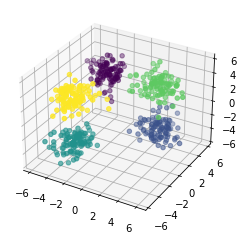

In [345]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=pred_01)
plt.show()

Using the adjusted Rand index: 

In [346]:
from sklearn import metrics
metrics.adjusted_rand_score(pred_01, labels)

0.9949848742198414

Applying automatic classification with K-means with a single trial (n_init = 2) using the random initialization method:

In [347]:
kmeans = KMeans(n_clusters=5, n_init=2, init='random').fit(data)
metrics.adjusted_rand_score(kmeans.labels_, labels)

C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0.9949848742198414

In [348]:
# n_init= 3

In [349]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=3, init='k-means++').fit(data)

C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [350]:
pred_02 = kmeans.predict(data)

In [351]:
print(kmeans.labels_)

[1 0 1 2 2 3 3 4 3 3 3 4 2 1 3 1 0 0 3 0 3 2 1 1 0 0 2 0 1 4 0 4 0 0 2 4 4
 4 0 2 2 4 1 0 1 1 0 0 1 0 2 2 2 0 2 4 1 1 4 0 1 3 1 1 2 1 4 0 2 4 3 4 1 3
 2 0 1 3 4 1 2 4 0 0 3 4 1 2 2 0 3 2 3 4 2 2 4 0 0 0 4 0 1 3 4 2 1 0 2 0 0
 4 3 2 0 0 2 3 0 2 4 3 1 0 3 3 2 2 2 4 4 3 4 4 1 0 4 2 0 3 4 4 0 2 1 1 1 3
 4 0 1 2 3 2 1 0 1 1 2 3 3 1 2 2 0 4 3 3 4 1 3 3 4 3 4 4 3 0 3 3 0 0 2 1 3
 1 4 0 2 2 1 0 1 4 2 1 1 3 2 2 3 0 4 3 4 0 3 4 1 3 1 1 3 3 4 4 1 2 3 1 1 1
 4 0 3 0 4 3 0 3 3 3 2 2 0 3 3 2 2 4 2 4 2 2 3 2 0 4 4 2 3 0 2 2 1 4 3 4 4
 0 0 4 0 1 3 4 0 1 3 0 0 1 2 0 1 2 1 4 4 2 1 4 4 2 0 0 2 0 4 4 4 1 4 4 4 2
 2 4 0 3 2 3 0 4 2 2 1 3 1 1 1 0 1 0 4 0 0 1 3 2 2 2 0 1 1 4 1 4 4 1 0 4 4
 1 2 1 1 0 2 4 3 3 2 2 3 3 0 4 4 4 1 3 3 2 3 4 2 4 3 3 3 4 2 2 0 2 4 2 4 3
 0 1 3 3 2 3 3 0 0 4 3 0 0 0 2 4 0 2 4 1 1 3 3 2 1 1 3 2 3 2 1 1 4 3 2 3 1
 2 4 0 0 1 3 4 2 4 2 1 2 4 3 1 4 4 3 4 3 2 1 2 2 4 1 0 0 2 1 1 3 0 0 2 3 3
 0 0 1 4 0 2 0 1 3 4 3 1 2 3 0 3 0 2 1 1 3 2 3 0 0 0 0 4 2 4 1 1 1 3 2 3 3
 1 0 3 1 1 0 1 1 2 4 2 3 

Visualize the results of this classification:

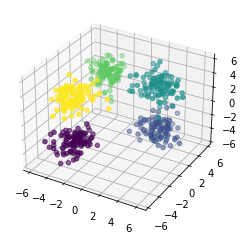

In [352]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=pred_02)
plt.show()

Using the adjusted Rand index: 

In [353]:
from sklearn import metrics
metrics.adjusted_rand_score(pred_02, labels)

0.9949848742198414

Applying automatic classification with K-means with a single trial (n_init = 3) using the random initialization method:

In [354]:
kmeans = KMeans(n_clusters=5, n_init=3, init='random').fit(data)
metrics.adjusted_rand_score(kmeans.labels_, labels)

C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0.9899699009151338

Question 2: Vary the number of clusters (n_clusters) and experiment for each value
of the number of clusters. Re-examine the stability of the results using the adjusted Rand
index. Explain what you see.

In [355]:
#Changing the number of clusters to 4

In [356]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(data)

C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [357]:
pred_03 = kmeans.predict(data)

In [358]:
print(kmeans.labels_)

[2 0 2 1 1 1 1 3 1 1 1 3 1 2 1 2 0 0 1 0 1 1 2 2 0 0 1 0 2 3 0 3 0 0 1 3 3
 3 0 1 1 3 2 0 2 2 0 0 2 0 1 1 1 0 1 3 2 2 3 0 2 1 2 2 1 2 3 0 1 3 1 3 2 1
 1 0 2 1 3 2 1 3 0 0 1 3 2 1 1 0 1 1 1 3 1 1 3 0 0 0 3 0 2 1 3 1 2 0 1 0 0
 3 1 1 0 0 1 1 0 1 3 1 2 0 1 1 1 1 1 3 3 1 3 3 2 0 3 1 0 1 3 3 0 1 2 2 2 1
 3 0 2 1 1 1 2 0 2 2 1 1 1 2 1 1 0 3 1 1 3 2 1 1 3 1 3 3 1 0 1 1 0 0 1 2 1
 2 3 0 1 2 2 0 2 3 1 2 2 1 1 1 1 0 3 1 3 0 1 3 2 1 2 2 1 1 3 3 2 1 1 2 2 2
 3 0 1 0 3 1 0 1 1 1 1 1 0 1 1 1 1 3 1 3 1 1 1 1 0 3 3 1 1 0 1 2 2 3 1 3 3
 0 0 3 0 2 1 3 0 2 1 0 0 2 1 0 2 1 2 3 3 1 2 3 3 1 0 0 1 0 3 3 3 2 3 3 3 1
 1 3 0 1 1 1 0 3 1 1 2 1 2 2 2 0 2 0 3 0 0 2 1 1 1 1 0 2 2 3 2 3 3 2 0 3 3
 2 1 2 2 0 1 3 1 1 1 1 1 1 0 3 3 3 2 1 1 1 1 3 1 3 1 1 1 3 1 1 0 1 3 1 3 1
 0 2 1 1 1 1 1 0 0 3 1 0 0 0 1 3 0 1 3 2 2 1 1 1 2 2 1 1 1 1 2 2 3 1 1 1 2
 1 3 0 0 2 1 3 1 3 1 2 1 3 1 2 3 3 1 3 1 1 2 1 1 3 2 0 0 1 2 2 1 0 0 1 1 1
 0 0 2 3 0 1 0 2 1 3 1 2 1 1 0 1 0 1 2 2 1 2 1 0 0 0 0 3 1 3 2 2 2 1 1 1 1
 2 0 1 2 2 0 2 2 1 3 1 1 

Visualize the results of this classification:

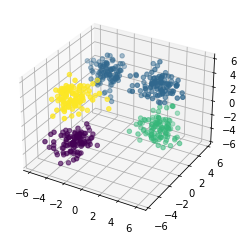

In [359]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=pred_03)
plt.show()

Using the adjusted Rand index:


In [360]:
from sklearn import metrics
metrics.adjusted_rand_score(pred_03, labels)

0.7763701329400672

Applying automatic classification with K-means with a single trial (n_init = 1) using the random initialization method:

In [361]:
kmeans = KMeans(n_clusters=4, n_init=1, init='random').fit(data)
metrics.adjusted_rand_score(kmeans.labels_, labels)

C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0.7763701329400672

In [362]:
#Changing the number of clusters to 3

In [363]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init=1, init='k-means++').fit(data)

C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [364]:
pred_04 = kmeans.predict(data)

In [365]:
print(kmeans.labels_)

[0 1 0 2 0 2 2 2 2 2 2 2 0 0 2 0 1 1 2 1 2 0 0 0 1 1 0 1 0 2 1 2 1 1 0 2 2
 2 1 0 0 2 0 1 0 0 1 1 0 1 0 0 0 1 0 2 0 0 2 1 0 2 0 0 0 0 2 1 0 2 2 2 0 2
 0 1 0 2 2 0 0 2 1 1 2 2 0 0 0 1 2 0 2 2 0 0 2 1 1 1 2 1 0 2 2 0 0 1 0 1 1
 2 2 0 1 1 0 2 1 0 2 2 0 1 2 2 0 0 0 2 2 2 2 2 0 1 2 0 1 2 2 2 1 0 0 0 0 2
 2 1 0 0 2 0 0 1 0 0 0 2 2 0 2 0 1 2 2 2 2 0 2 2 2 2 1 2 2 1 2 2 1 1 0 0 2
 0 2 1 0 0 0 1 0 2 0 0 0 2 0 0 2 1 2 2 2 1 2 2 0 2 0 0 2 2 2 2 0 0 2 0 0 0
 2 1 2 1 2 2 1 2 2 2 0 0 1 2 2 0 0 2 0 2 0 0 2 0 1 2 2 0 2 1 0 0 0 2 2 2 2
 1 1 2 1 0 2 2 1 0 2 1 1 0 0 1 0 0 0 2 2 0 0 2 1 0 1 1 0 1 2 2 2 0 2 2 2 0
 0 2 1 2 0 2 1 2 2 0 0 2 0 0 0 1 0 1 2 1 1 0 2 0 0 0 1 0 0 2 0 2 2 0 1 2 2
 0 0 0 0 1 0 2 2 2 0 0 2 2 1 2 2 2 0 2 2 0 2 2 0 2 2 2 2 2 0 0 1 0 2 0 2 2
 1 0 2 2 0 2 2 1 1 2 2 1 1 1 0 2 1 0 2 0 0 2 2 0 0 0 2 0 2 0 0 0 2 2 0 2 0
 0 2 1 1 0 2 2 2 2 0 0 0 2 2 0 2 2 2 2 2 0 0 0 0 2 0 1 1 0 0 0 2 1 1 0 2 2
 1 1 0 2 1 0 1 0 2 2 2 0 0 2 1 2 1 0 0 0 2 0 2 1 1 1 1 2 0 2 0 0 0 2 0 2 2
 0 1 2 0 0 1 0 0 0 2 0 2 

Visualize the results of this classification:


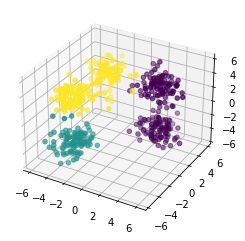

In [366]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=pred_04)
plt.show()

Using the adjusted Rand index: 

In [367]:
from sklearn import metrics
metrics.adjusted_rand_score(pred_04 , labels)

0.591567767806254

Applying automatic classification with K-means with a single trial (n_init = 1) using the random initialization method:

In [368]:
kmeans = KMeans(n_clusters=3, n_init=1, init='random').fit(data)
metrics.adjusted_rand_score(kmeans.labels_, labels)

C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0.6012029655365917

In [369]:
#Changing the number of clusters to 2

In [370]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_init=1, init='k-means++').fit(data)

C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [371]:
pred_05= kmeans.predict(data)

In [372]:
print(kmeans.labels_)

[1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1
 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0
 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1
 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0
 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0
 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0
 1 0 0 1 1 0 1 1 1 0 1 0 

Visualize the results of this classification:


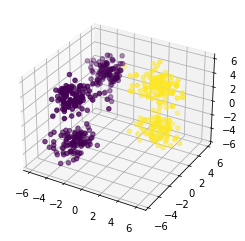

In [373]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=pred_05)
plt.show()

In [374]:
from sklearn import metrics
metrics.adjusted_rand_score(pred_05, labels)

0.37097533586788717

Applying automatic classification with K-means with a single trial (n_init = 1) using the random initialization method:

In [375]:
kmeans = KMeans(n_clusters=2, n_init=1, init='random').fit(data)
metrics.adjusted_rand_score(kmeans.labels_, labels)

C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0.37097533586788717

In [376]:
#Changing the number of clusters to 1

In [377]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=1, n_init=1, init='k-means++').fit(data)

C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [378]:
pred_06= kmeans.predict(data)

In [379]:
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

Visualize the results of this classification:


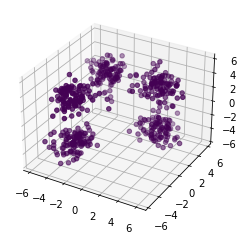

In [380]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=pred_06)
plt.show()

Using the adjusted Rand index: 

In [381]:
from sklearn import metrics
metrics.adjusted_rand_score(pred_06, labels)

0.0

Applying automatic classification with K-means with a single trial (n_init = 1) using the random initialization method:

In [382]:
kmeans = KMeans(n_clusters=1, n_init=1, init='random').fit(data)
metrics.adjusted_rand_score(kmeans.labels_, labels)

C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0.0

We can notice that as we start reducing the number of clusters the adjusted_rand_score value keeps decreasing, thereby letting us know that is there is a less degree of similarity bewtween the clusters.



Question 3: Vary the number of groups (n_clusters) between 2 and 20, plot the
evolution graph of the final value reached by the cost (inertia, see documentation) for
each of the values of n_clusters.

In [383]:
# Changing the number of clusters to 6

In [384]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, n_init=1, init='k-means++').fit(data)

C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [385]:
pred_07= kmeans.predict(data)

In [386]:
print(kmeans.labels_)

[4 0 4 2 1 5 5 3 5 5 2 3 1 4 5 4 0 0 2 0 5 1 4 4 0 0 1 0 4 3 0 3 0 0 1 3 3
 3 0 1 1 3 4 0 4 4 0 0 4 0 1 1 1 0 1 3 4 4 3 0 4 2 4 4 1 4 3 0 2 3 5 3 4 5
 1 0 4 2 3 4 1 3 0 0 2 3 4 1 1 0 2 1 2 3 1 1 3 0 0 0 3 0 4 5 3 1 4 0 1 0 0
 3 2 1 0 0 1 5 0 1 3 2 4 0 5 5 1 1 1 3 3 2 3 3 4 0 3 1 0 5 3 3 0 1 4 4 4 5
 3 0 4 1 5 1 4 0 4 4 1 2 2 4 2 1 0 3 5 5 3 4 5 2 3 5 3 3 5 0 5 5 0 0 1 4 2
 4 3 0 1 1 4 0 4 3 1 4 4 2 1 1 5 0 3 2 3 0 5 3 4 5 4 4 5 2 3 3 4 1 5 4 4 4
 3 0 2 0 3 2 0 5 2 5 1 1 0 2 5 1 1 3 1 3 1 1 5 1 0 3 3 1 5 0 1 1 4 3 5 3 3
 0 0 3 0 4 5 3 0 4 2 0 0 4 1 0 4 1 4 3 3 1 4 3 3 1 0 0 1 0 3 3 3 4 3 3 3 1
 1 3 0 2 1 5 0 3 1 1 4 5 4 4 4 0 4 0 3 0 0 4 2 1 1 1 0 4 4 3 4 3 3 4 0 3 3
 4 1 4 4 0 1 2 2 2 1 1 5 2 0 3 3 3 4 2 2 1 2 3 1 3 5 5 2 3 1 1 0 1 3 1 3 2
 0 4 2 5 1 2 5 0 0 3 5 0 0 0 1 3 0 1 3 4 4 2 5 1 4 4 2 1 5 1 4 4 3 5 1 5 4
 1 3 0 0 4 5 3 1 3 1 4 1 3 2 4 3 3 2 3 2 1 4 1 1 3 4 0 0 1 4 4 5 0 0 1 2 2
 0 0 4 3 0 1 0 4 2 3 2 4 1 5 0 5 0 1 4 4 5 4 5 0 0 0 0 3 2 3 4 4 4 5 1 2 2
 4 0 2 4 4 0 4 4 1 3 1 5 

Visualize the results of this classification:

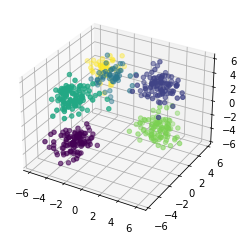

In [387]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=pred_07)
plt.show()

Using the adjusted Rand index: 

In [388]:
from sklearn import metrics
metrics.adjusted_rand_score(pred_07, labels)

0.915831369019738

Applying automatic classification with K-means with a single trial (n_init = 1) using the random initialization method:

In [389]:
kmeans = KMeans(n_clusters=6, n_init=1, init='random').fit(data)
metrics.adjusted_rand_score(kmeans.labels_, labels)

C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0.9354856583491864

In [390]:
#Changing the number of clusters to 10

In [391]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, n_init=1, init='k-means++').fit(data)

C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [392]:
pred_08 = kmeans.predict(data)

In [393]:
print(kmeans.labels_)

[6 3 6 2 4 9 9 5 9 9 2 8 4 6 9 0 7 3 2 3 9 4 6 0 7 7 4 7 6 1 7 5 3 7 4 1 1
 1 7 4 4 1 0 3 6 6 3 7 6 3 4 4 4 7 4 1 6 6 8 7 0 2 6 6 4 6 5 3 2 5 9 5 6 9
 4 7 6 2 5 6 4 8 3 3 2 5 0 4 4 7 2 4 2 5 4 4 8 7 7 3 8 3 6 2 1 4 0 3 4 3 3
 1 2 4 7 7 4 9 3 4 1 2 0 3 9 9 4 4 4 1 1 9 1 8 6 7 1 4 7 9 5 1 7 4 6 0 0 9
 1 7 6 4 9 4 6 3 6 0 4 2 2 0 2 4 3 1 2 9 5 0 9 2 5 9 1 1 9 7 9 9 3 3 4 0 2
 6 5 7 4 4 6 3 6 5 4 0 6 2 4 4 9 3 1 2 5 3 9 5 0 9 6 0 9 2 5 5 6 4 9 0 0 0
 5 7 2 7 1 2 3 9 2 9 4 4 3 2 9 4 4 8 4 1 4 4 9 4 7 1 8 4 9 7 4 4 0 1 9 1 5
 3 3 8 3 0 9 8 7 0 2 3 3 6 4 7 0 4 0 5 5 4 0 8 1 4 7 3 4 3 8 5 8 6 1 1 8 4
 4 1 7 2 4 9 3 1 4 4 0 2 0 0 0 3 0 7 5 3 3 0 2 4 4 4 3 0 6 5 0 1 1 6 7 8 5
 0 4 6 6 3 4 5 2 2 4 4 9 2 3 1 8 8 6 2 2 4 2 8 4 8 9 2 2 1 4 4 7 4 5 4 5 2
 3 6 2 9 4 2 9 3 3 1 9 3 3 7 4 5 3 4 5 0 6 2 9 4 0 0 2 4 9 4 6 0 8 9 4 9 0
 4 5 7 7 0 9 5 4 1 4 6 4 5 2 6 8 5 2 8 2 4 0 4 4 8 0 7 7 4 6 6 9 3 3 4 2 2
 7 3 6 8 3 4 3 0 2 1 2 0 4 9 3 2 3 4 0 0 9 4 9 7 3 7 3 5 2 5 0 0 6 9 4 2 2
 6 7 2 6 6 3 6 6 4 5 4 2 

Visualize the results of this classification:


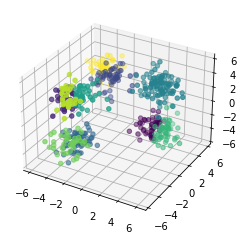

In [394]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=pred_08)
plt.show()

Using the adjusted Rand index:


In [395]:
from sklearn import metrics
metrics.adjusted_rand_score(pred_08, labels)

0.653746263030048

Applying automatic classification with K-means with a single trial (n_init = 1) using the random initialization method:


In [396]:
kmeans = KMeans(n_clusters=10, n_init=1, init='random').fit(data)
metrics.adjusted_rand_score(kmeans.labels_, labels)

C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0.7623336408476308

In [397]:
# Changing the number of clusters to 15

In [398]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=15, n_init=1, init='k-means++').fit(data)

C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [399]:
pred_09 = kmeans.predict(data)

In [400]:
print(pred_09)

[10  5 10  3 14  6  6  7  6  6 11  7 14  8  6 12  9  5  1  5  6  3 10 12
  9  9  3  9  0  4  9  7  2  9 14  7  7  7  9 14  3  4 12  2 10 10  5  9
 10  5  3  3  3  2  3  4  8 10  4  2 12 11  8  8  3  8  7  5 11  7  1  7
  8  6  3  2 10 11  7 10  3  4  5  2  1  7  8 13 14  2 11  3 11  7 14  3
  4  9  9  5  4  2 10  6  4 13 12  5  3  5  5  4  1  3  9  9 13  6  5  3
  4 11  8  5  6  6  3 13  3  4  4  1  4  4  8  9  7 13  9  6  7  4  9 13
 10 12 12  1  7  9  0 14  6 13  0  2 10  8 13 11  1  0 11  3  2  4  1  6
  7  8  6  1  7  6  7  4  6  9  1  6  2  5 13  0  1 10  7  2  3 13  0  5
  8  7 13  0  8 11  3 13  6  5  4  1  7  5  6  7  0  1 10  0  6 11  7  7
  8  3  6 12 12 12  7  9  1  9  4  1  5  1 11  6  3 14  5  1  1  3  3  4
 13  4  3 13  1 13  9  7  4 14  6  9 13 13  8  4  1  7  7  5  5  4  2  8
  6  4  9  8  1  5  2 10 13  9 12  3 12  7  7 14 12  4  4 14  2  5 14  5
  4  4  4  0  4  7  4 13 14  4  9 11 14  1  5  4  3 14 12  1  0 12  8  5
  0  9  7  5  5  0  1 13 14  3  5  8 10  7 12  4  7

In [401]:
print(kmeans.labels_)

[10  5 10  3 14  6  6  7  6  6 11  7 14  8  6 12  9  5  1  5  6  3 10 12
  9  9  3  9  0  4  9  7  2  9 14  7  7  7  9 14  3  4 12  2 10 10  5  9
 10  5  3  3  3  2  3  4  8 10  4  2 12 11  8  8  3  8  7  5 11  7  1  7
  8  6  3  2 10 11  7 10  3  4  5  2  1  7  8 13 14  2 11  3 11  7 14  3
  4  9  9  5  4  2 10  6  4 13 12  5  3  5  5  4  1  3  9  9 13  6  5  3
  4 11  8  5  6  6  3 13  3  4  4  1  4  4  8  9  7 13  9  6  7  4  9 13
 10 12 12  1  7  9  0 14  6 13  0  2 10  8 13 11  1  0 11  3  2  4  1  6
  7  8  6  1  7  6  7  4  6  9  1  6  2  5 13  0  1 10  7  2  3 13  0  5
  8  7 13  0  8 11  3 13  6  5  4  1  7  5  6  7  0  1 10  0  6 11  7  7
  8  3  6 12 12 12  7  9  1  9  4  1  5  1 11  6  3 14  5  1  1  3  3  4
 13  4  3 13  1 13  9  7  4 14  6  9 13 13  8  4  1  7  7  5  5  4  2  8
  6  4  9  8  1  5  2 10 13  9 12  3 12  7  7 14 12  4  4 14  2  5 14  5
  4  4  4  0  4  7  4 13 14  4  9 11 14  1  5  4  3 14 12  1  0 12  8  5
  0  9  7  5  5  0  1 13 14  3  5  8 10  7 12  4  7

Visualize the results of this classification:

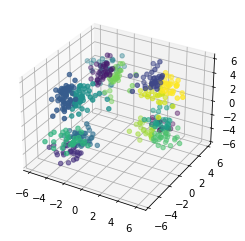

In [402]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=pred_09)
plt.show()

Using the adjusted Rand index:


In [403]:
from sklearn import metrics
metrics.adjusted_rand_score(pred_09, labels)

0.45437014117554203

Applying automatic classification with K-means with a single trial (n_init = 1) using the random initialization method:


In [404]:
kmeans = KMeans(n_clusters=15, n_init=1, init='random').fit(data)
metrics.adjusted_rand_score(kmeans.labels_, labels)

C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0.6109020980388762

In [405]:
#Changing the number of clusters to 20

In [406]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20, n_init=1, init='k-means++').fit(data)

C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [407]:
pred_10 = kmeans.predict(data)

In [408]:
print(kmeans.labels_)

[15  7 15 19 11 10 10  3 10 10  4  8 11 12  4  5 17  0  2  7  2  6 15  5
 14 14  6 17 12  8 17  3 13 17 18  8 16 16 14 11  6  9  5 13 15 15  0 14
 15  7  6  6  6 13 11  9 15 15  8 13  5 19 12 12 11 12  3  7 19  3  2  3
 12 10  6 13  5 19  3 15  6  8  7 13 19 16 12  1 18 13  4  6 19  9 11  6
  8 14 17  0  9  0 15  4  9  1  5  7  6  7  7 16  4  6 17 14  1  2  7  6
  9  4  5  0  4  2 11  1  6 16  9  2  9  9 12 14 16 11 14  4  3  9 14 11
 15  5  5  2 16 14 12 11 10  1 12 13 15 12 11 19 19 12 19  6  0  9  2  2
 16  5  2  4 16 10 16  8 10 14  2  2  0  0  1 12 19 15  3 17  6  1 12  7
 15 16 11 12 15 19  6 11 10  7  9  4  3  7  2 16 12  2 15 12 10 19  8  3
  5  6 10  5  5  5 16  7  2 17 16 19  7  2 19 10  6 18  7 19  2  6 11  9
  1  8  6  1  2  1 17 16  9 18  2 14 11  1 12  9  2 16  3  0  7  8 13 12
 10  9 17 12 19  0 13 15 11 14  5  6  5 16  3 18  5  9  8 18 13  7 18  0
  8  9  8 12  8 16  8  1 11  9 14  4 18  2  7  9  6 18  5  2 12  5 12  0
 12 17  3  0  7 12  2 11 18  6  7 12 15  8  5  9 16

Visualize the results of this classification:

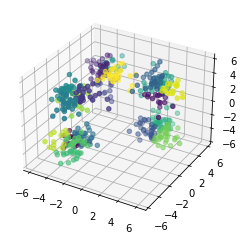

In [409]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=pred_10)
plt.show()

Using the adjusted Rand index:

In [410]:
from sklearn import metrics
metrics.adjusted_rand_score(pred_10, labels)

0.35136648223162326

Applying automatic classification with K-means with a single trial (n_init = 1) using the random initialization method:

In [411]:
kmeans = KMeans(n_clusters=20, n_init=1, init='random').fit(data)
metrics.adjusted_rand_score(kmeans.labels_, labels)

C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0.40556271457074894

plot the evolution graph of the final value reached by the cost (inertia, see documentation) for each of the values of n_clusters.

In [453]:
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import numpy as np

In [454]:
inertia = []

In [455]:
for k in range(2,21):
    kmeans = KMeans(n_clusters = k,random_state = 42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

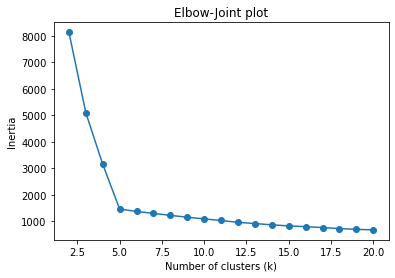

In [456]:
#Plotting the elbow joint plot
plt.plot(range(2,21), inertia, marker = 'o')
plt.title('Elbow-Joint plot')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

Question 4: Generate 500 data with a uniform distribution in [0,1]3 (three-dimensional
data in the unit cube). Apply on these data K-means with n_clusters=5 and random
initialization (random) and examine the stability of the results using the Rand index.
Apply on this same K-means data with always n_clusters=5 but a k-means++
initialization, examine the stability of the results. Be careful, you no longer have any
groups defined at the start; to define the reference groups, to which you will compare
those from other classifications, you can apply K-means for the first time with
n_clusters=5, n_init=1, init='k-means++'. Do you observe any
differences compared to the results obtained on the data generated at the beginning of this
section (with np.random.randn)? Explain.

4. Classification with K-means of "texture" data
As a reminder, these data correspond to 5500 observations described by 40 variables. Each
observation belongs to one of the 11 texture classes; each class is represented by 500
observations. We will apply K-means to this data, with n_clusters = 11, and examine
how close the groups resulting from the automatic classification are to the present classes.
Mix the observations and apply K-means to this data (be careful, the last column contains
the class labels):

Question 5: Apply discriminant analysis to this data and again apply K-means with
n_clusters = 11 to the projected data in the discriminant space. What do you notice?
Explain. Visualize the results.

In [426]:
textures = np.loadtxt("C:/Users/Andrea/Desktop/BISHOP'S ASSIGNMENT/texture.dat")
np.random.shuffle(textures)
kmeans = KMeans(n_clusters=11).fit(textures[:,:40])
metrics.adjusted_rand_score(kmeans.labels_, textures[:,40])

C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.46563185113670313

In [427]:
print(textures)

[[-1.20345265 -0.7884061  -0.75643107 ... -0.64662377 -0.72817578
   2.        ]
 [-1.13989441 -0.55413095 -0.54166094 ... -0.39516567 -0.37907035
   8.        ]
 [-0.96961528 -0.32741332 -0.38912039 ... -0.38018693 -0.34156567
  14.        ]
 ...
 [-1.28238385 -0.48263914 -0.2866102  ... -0.50015717 -0.65696831
   7.        ]
 [-1.11965458 -0.46875987 -0.61922157 ... -0.55175791 -0.57420328
  14.        ]
 [-1.07713397 -0.43336523 -0.60042674 ... -0.51503756 -0.55178699
  14.        ]]


In [428]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [429]:
#Applying Discriminant analysis
X = textures[:, :-1]
y = textures[:, -1]



In [430]:
clf = LinearDiscriminantAnalysis(n_components= 2)

In [431]:
clf_01 = clf.fit_transform(X, y)

In [447]:
print(clf_01)

[[  2.22037053   4.57487479]
 [  1.90246129  -2.59865237]
 [  4.3414829   -3.18392405]
 ...
 [-20.69985241  -2.63954755]
 [  4.394558    -2.76593733]
 [  4.73967831  -2.10073476]]


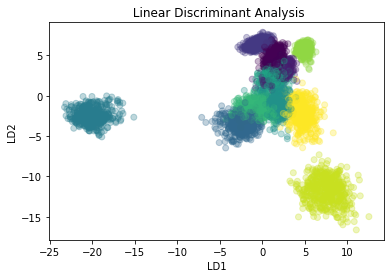

In [432]:
#Visualizing the results 
plt.scatter(clf_01[:,0], clf_01[:, 1], c=y, cmap = 'viridis', alpha = 0.3)
plt.title( " Linear Discriminant Analysis")
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()

And again apply K-means with
n_clusters = 11 to the projected data in the discriminant space. What do you notice?
Explain. Visualize the results.

In [433]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [434]:
kmeans = KMeans(n_clusters = 11, random_state = 42)
kmeans.fit(X)

C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=11, random_state=42)

In [435]:
labels = kmeans.labels_

In [436]:
centroids = kmeans.cluster_centers_

In [437]:
print(labels)

[7 8 8 ... 6 3 3]


In [438]:
print(centroids)

[[-1.17591490e+00 -5.06703548e-01 -2.88540294e-01 -3.00100847e-01
  -1.54610327e-01 -7.54617790e-02 -5.18417894e-01 -2.63642440e-01
  -1.29112845e-01 -2.28988923e-01 -1.17591490e+00 -5.01262569e-01
  -2.05797560e-01 -5.63873429e-01 -3.29566640e-01 -5.17384354e-01
  -6.10902316e-01 -3.15740970e-01 -3.09023935e-01 -2.07339853e-01
  -1.17591490e+00 -7.26692299e-01 -7.62778170e-01 -5.37097224e-01
  -4.27015946e-01 -3.13024776e-01 -7.12975909e-01 -5.30183266e-01
  -4.28743590e-01 -7.49614081e-01 -1.17591490e+00 -6.06323930e-01
  -2.34598892e-01 -6.17086393e-01 -3.34347201e-01 -4.65017945e-01
  -7.18703219e-01 -3.84349349e-01 -3.45008875e-01 -3.00372985e-01]
 [-1.20544266e+00 -7.42889336e-01 -1.12401265e+00 -5.53649945e-01
  -5.83679205e-01 -3.60395783e-01 -7.41554844e-01 -6.92838577e-01
  -5.69031173e-01 -1.09854660e+00 -1.20544266e+00 -8.39020749e-01
  -9.12780750e-01 -8.08539263e-01 -7.60639541e-01 -8.33827109e-01
  -9.81780882e-01 -8.42446028e-01 -8.19958147e-01 -9.94585685e-01
  -1.2054

Visualyzing the results below :

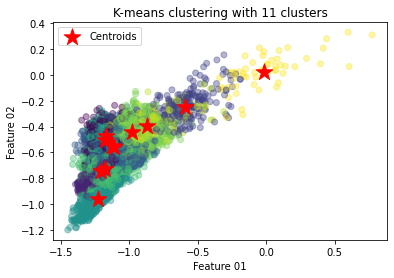

In [446]:
plt.scatter(X[:, 0], X[:, 1], c= labels,cmap = 'viridis', alpha = 0.4)
plt.scatter(centroids[:,0], centroids[:, 1], c='red', marker='*', s=300, label='Centroids')
plt.title("K-means clustering with 11 clusters")
plt.xlabel('Feature 01')
plt.ylabel('Feature 02')
plt.legend()
plt.show()